In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
# data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
# y_cols = list(data_df_full.columns[8:])
# cols = y_cols.copy()
# cols.insert(0,'x')
# data_df = data_df_full[cols].copy()
# data_df.head(10)

data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,239,0,0,1,167,0,...,0,0,246,5,0,0,183,26,0,0
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,45,0,44,244,19,1,...,1,1,147,10,0,0,210,30,0,0
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,13,0,28,389,2,0,...,0,0,388,27,0,0,366,40,0,0
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,0,19,4,0,5,41,...,0,0,88,19,0,0,119,5,0,0


In [4]:
X = data_df['x']
y = data_df[y_cols]

In [5]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
# alphabet=['A', 'C', 'D', 'E', 'F',
#           'G', 'H', 'I', 'K', 'L',
#           'M', 'N', 'P', 'Q', 'R',
#           'S', 'T', 'V', 'W', 'Y', '*']


alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [6]:
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

# # instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)



2022-10-31 10:47:25.909619: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [9]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [10]:
bounds = np.array([[0,180],[180,1400],[1400,10500],[10500,250000]])
bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0,180
1,180,1400
2,1400,10500
3,10500,250000


### I don't know how to obtain these values
Using arbitrary values for now just to be able to debug Titeseq MP.
Get these from figure 2B

In [11]:
mu_neg = 50
mu_pos = 700000
sigma_neg = 100
sigma_pos = 50000

In [12]:
mp_list = [mavenn.measurement_process_layers.DiscreteMonotonicMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=4,
                                                                      K=10,
                                                                      eta=1e-5,)
           for mp in range(len(y_cols)//4)
          ]

In [13]:
# there are 16 measurement processes in this 
len(mp_list)

16

In [14]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [15]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [16]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=False)

N = 165,825 observations set as training data.
Using 20.0% for validation.
Time to set data: 24.0 sec.


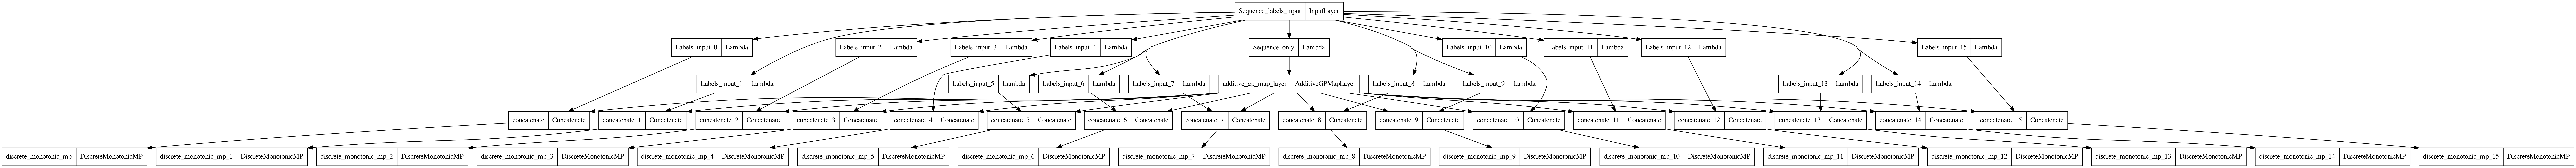

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=False,show_dtype=False,dpi=300,to_file='titeseq_dmr.png')

In [18]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=150,
          batch_size=400,
          try_tqdm = True,
          early_stopping=True,
          early_stopping_patience=5,
          linear_initialization=False)

0epoch [00:00, ?epoch/s]

Epoch 1/150
332/332 [==============================] - 19s 31ms/step - loss: 1140486.5000 - discrete_monotonic_mp_loss: 78014.8125 - discrete_monotonic_mp_1_loss: 73512.8828 - discrete_monotonic_mp_2_loss: 77694.9688 - discrete_monotonic_mp_3_loss: 109555.5625 - discrete_monotonic_mp_4_loss: 83694.0625 - discrete_monotonic_mp_5_loss: 85358.7422 - discrete_monotonic_mp_6_loss: 92829.1406 - discrete_monotonic_mp_7_loss: 79426.6406 - discrete_monotonic_mp_8_loss: 74090.5625 - discrete_monotonic_mp_9_loss: 63502.5898 - discrete_monotonic_mp_10_loss: 58513.6562 - discrete_monotonic_mp_11_loss: 73562.6719 - discrete_monotonic_mp_12_loss: 53936.5117 - discrete_monotonic_mp_13_loss: 41920.4688 - discrete_monotonic_mp_14_loss: 42485.2891 - discrete_monotonic_mp_15_loss: 52388.5820 - I_var: -0.2533 - val_loss: 1040290.3125 - val_discrete_monotonic_mp_loss: 71122.3047 - val_discrete_monotonic_mp_1_loss: 66867.3750 - val_discrete_monotonic_mp_2_loss: 71108.3906 - val_discrete_monotonic_mp_3_loss: 

332/332 [==============================] - 6s 19ms/step - loss: 926007.6250 - discrete_monotonic_mp_loss: 59936.0859 - discrete_monotonic_mp_1_loss: 57739.6016 - discrete_monotonic_mp_2_loss: 60886.0195 - discrete_monotonic_mp_3_loss: 87817.0156 - discrete_monotonic_mp_4_loss: 61956.9531 - discrete_monotonic_mp_5_loss: 67714.8359 - discrete_monotonic_mp_6_loss: 73108.7578 - discrete_monotonic_mp_7_loss: 66986.0469 - discrete_monotonic_mp_8_loss: 66429.3828 - discrete_monotonic_mp_9_loss: 56165.8867 - discrete_monotonic_mp_10_loss: 50483.7070 - discrete_monotonic_mp_11_loss: 65301.7812 - discrete_monotonic_mp_12_loss: 42644.8711 - discrete_monotonic_mp_13_loss: 31560.0918 - discrete_monotonic_mp_14_loss: 34100.4727 - discrete_monotonic_mp_15_loss: 43175.7578 - I_var: -0.0377 - val_loss: 896311.8750 - val_discrete_monotonic_mp_loss: 57702.7891 - val_discrete_monotonic_mp_1_loss: 55253.2695 - val_discrete_monotonic_mp_2_loss: 58433.3438 - val_discrete_monotonic_mp_3_loss: 86110.7031 - val

332/332 [==============================] - 6s 19ms/step - loss: 751542.0000 - discrete_monotonic_mp_loss: 41856.4453 - discrete_monotonic_mp_1_loss: 41342.4492 - discrete_monotonic_mp_2_loss: 45666.0469 - discrete_monotonic_mp_3_loss: 66075.9062 - discrete_monotonic_mp_4_loss: 44600.7891 - discrete_monotonic_mp_5_loss: 49725.7734 - discrete_monotonic_mp_6_loss: 52667.6250 - discrete_monotonic_mp_7_loss: 51598.8398 - discrete_monotonic_mp_8_loss: 52548.0273 - discrete_monotonic_mp_9_loss: 45919.8906 - discrete_monotonic_mp_10_loss: 47525.8281 - discrete_monotonic_mp_11_loss: 62798.8906 - discrete_monotonic_mp_12_loss: 42018.3359 - discrete_monotonic_mp_13_loss: 31037.5410 - discrete_monotonic_mp_14_loss: 33560.6719 - discrete_monotonic_mp_15_loss: 42598.6875 - I_var: -0.0224 - val_loss: 790284.3750 - val_discrete_monotonic_mp_loss: 44857.2422 - val_discrete_monotonic_mp_1_loss: 43928.1914 - val_discrete_monotonic_mp_2_loss: 48055.4141 - val_discrete_monotonic_mp_3_loss: 72987.7969 - val

332/332 [==============================] - 7s 20ms/step - loss: 704084.6250 - discrete_monotonic_mp_loss: 38115.9961 - discrete_monotonic_mp_1_loss: 37965.3203 - discrete_monotonic_mp_2_loss: 42594.5078 - discrete_monotonic_mp_3_loss: 57609.0039 - discrete_monotonic_mp_4_loss: 40723.2070 - discrete_monotonic_mp_5_loss: 45362.6992 - discrete_monotonic_mp_6_loss: 48032.8398 - discrete_monotonic_mp_7_loss: 47755.8750 - discrete_monotonic_mp_8_loss: 47580.4297 - discrete_monotonic_mp_9_loss: 42031.7617 - discrete_monotonic_mp_10_loss: 46319.3164 - discrete_monotonic_mp_11_loss: 61940.9336 - discrete_monotonic_mp_12_loss: 41842.3242 - discrete_monotonic_mp_13_loss: 30845.5664 - discrete_monotonic_mp_14_loss: 33289.0859 - discrete_monotonic_mp_15_loss: 42075.9883 - I_var: -0.0107 - val_loss: 701077.2500 - val_discrete_monotonic_mp_loss: 38259.6641 - val_discrete_monotonic_mp_1_loss: 37967.3633 - val_discrete_monotonic_mp_2_loss: 42455.8750 - val_discrete_monotonic_mp_3_loss: 59000.5391 - val

332/332 [==============================] - 6s 19ms/step - loss: 687676.1875 - discrete_monotonic_mp_loss: 36898.8945 - discrete_monotonic_mp_1_loss: 36757.2539 - discrete_monotonic_mp_2_loss: 41697.4219 - discrete_monotonic_mp_3_loss: 55089.0117 - discrete_monotonic_mp_4_loss: 39395.3477 - discrete_monotonic_mp_5_loss: 43950.2188 - discrete_monotonic_mp_6_loss: 46564.3945 - discrete_monotonic_mp_7_loss: 46394.5000 - discrete_monotonic_mp_8_loss: 45768.5430 - discrete_monotonic_mp_9_loss: 40774.6875 - discrete_monotonic_mp_10_loss: 45476.1641 - discrete_monotonic_mp_11_loss: 61298.8594 - discrete_monotonic_mp_12_loss: 41753.8086 - discrete_monotonic_mp_13_loss: 30794.0352 - discrete_monotonic_mp_14_loss: 33216.9609 - discrete_monotonic_mp_15_loss: 41845.6875 - I_var: -0.0041 - val_loss: 691567.0625 - val_discrete_monotonic_mp_loss: 37524.4414 - val_discrete_monotonic_mp_1_loss: 37197.1289 - val_discrete_monotonic_mp_2_loss: 42039.1875 - val_discrete_monotonic_mp_3_loss: 57450.0391 - val

332/332 [==============================] - 6s 18ms/step - loss: 676790.3125 - discrete_monotonic_mp_loss: 36115.4922 - discrete_monotonic_mp_1_loss: 35897.7930 - discrete_monotonic_mp_2_loss: 41171.7070 - discrete_monotonic_mp_3_loss: 53793.9453 - discrete_monotonic_mp_4_loss: 38517.1992 - discrete_monotonic_mp_5_loss: 42986.1133 - discrete_monotonic_mp_6_loss: 45418.3164 - discrete_monotonic_mp_7_loss: 45374.5742 - discrete_monotonic_mp_8_loss: 44686.0312 - discrete_monotonic_mp_9_loss: 39935.4023 - discrete_monotonic_mp_10_loss: 44723.4336 - discrete_monotonic_mp_11_loss: 60782.8828 - discrete_monotonic_mp_12_loss: 41684.8555 - discrete_monotonic_mp_13_loss: 30766.2207 - discrete_monotonic_mp_14_loss: 33181.9180 - discrete_monotonic_mp_15_loss: 41754.0273 - I_var: -4.0920e-04 - val_loss: 673795.6875 - val_discrete_monotonic_mp_loss: 36289.8047 - val_discrete_monotonic_mp_1_loss: 35937.4219 - val_discrete_monotonic_mp_2_loss: 41082.7617 - val_discrete_monotonic_mp_3_loss: 55293.3906 -

332/332 [==============================] - 7s 20ms/step - loss: 668208.0625 - discrete_monotonic_mp_loss: 35457.2344 - discrete_monotonic_mp_1_loss: 35139.3594 - discrete_monotonic_mp_2_loss: 40745.6055 - discrete_monotonic_mp_3_loss: 52753.0742 - discrete_monotonic_mp_4_loss: 37682.7383 - discrete_monotonic_mp_5_loss: 42226.6641 - discrete_monotonic_mp_6_loss: 44501.8555 - discrete_monotonic_mp_7_loss: 44483.6133 - discrete_monotonic_mp_8_loss: 43934.4023 - discrete_monotonic_mp_9_loss: 39445.5938 - discrete_monotonic_mp_10_loss: 44238.1641 - discrete_monotonic_mp_11_loss: 60381.4453 - discrete_monotonic_mp_12_loss: 41626.1016 - discrete_monotonic_mp_13_loss: 30741.7852 - discrete_monotonic_mp_14_loss: 33161.1133 - discrete_monotonic_mp_15_loss: 41688.8633 - I_var: -0.0018 - val_loss: 663912.8750 - val_discrete_monotonic_mp_loss: 35563.2109 - val_discrete_monotonic_mp_1_loss: 35132.8672 - val_discrete_monotonic_mp_2_loss: 40596.5430 - val_discrete_monotonic_mp_3_loss: 53980.2305 - val

332/332 [==============================] - 7s 20ms/step - loss: 659358.6875 - discrete_monotonic_mp_loss: 34824.7109 - discrete_monotonic_mp_1_loss: 34440.3164 - discrete_monotonic_mp_2_loss: 40245.4453 - discrete_monotonic_mp_3_loss: 51527.1328 - discrete_monotonic_mp_4_loss: 36846.8984 - discrete_monotonic_mp_5_loss: 41359.5820 - discrete_monotonic_mp_6_loss: 43539.7070 - discrete_monotonic_mp_7_loss: 43602.2617 - discrete_monotonic_mp_8_loss: 43084.9258 - discrete_monotonic_mp_9_loss: 38981.4375 - discrete_monotonic_mp_10_loss: 43784.1523 - discrete_monotonic_mp_11_loss: 60040.9531 - discrete_monotonic_mp_12_loss: 41577.9961 - discrete_monotonic_mp_13_loss: 30712.0273 - discrete_monotonic_mp_14_loss: 33140.2344 - discrete_monotonic_mp_15_loss: 41650.3672 - I_var: -0.0013 - val_loss: 657145.6250 - val_discrete_monotonic_mp_loss: 35051.0156 - val_discrete_monotonic_mp_1_loss: 34561.6406 - val_discrete_monotonic_mp_2_loss: 40248.7500 - val_discrete_monotonic_mp_3_loss: 52909.7734 - val

332/332 [==============================] - 6s 19ms/step - loss: 652913.9375 - discrete_monotonic_mp_loss: 34334.4375 - discrete_monotonic_mp_1_loss: 33862.8008 - discrete_monotonic_mp_2_loss: 39877.8125 - discrete_monotonic_mp_3_loss: 50535.8516 - discrete_monotonic_mp_4_loss: 36271.6172 - discrete_monotonic_mp_5_loss: 40686.7734 - discrete_monotonic_mp_6_loss: 42753.7070 - discrete_monotonic_mp_7_loss: 42999.9297 - discrete_monotonic_mp_8_loss: 42536.4531 - discrete_monotonic_mp_9_loss: 38764.8438 - discrete_monotonic_mp_10_loss: 43466.2383 - discrete_monotonic_mp_11_loss: 59876.6875 - discrete_monotonic_mp_12_loss: 41521.9883 - discrete_monotonic_mp_13_loss: 30686.1777 - discrete_monotonic_mp_14_loss: 33105.0977 - discrete_monotonic_mp_15_loss: 41632.8008 - I_var: 5.0242e-04 - val_loss: 648123.9375 - val_discrete_monotonic_mp_loss: 34377.3125 - val_discrete_monotonic_mp_1_loss: 33830.0547 - val_discrete_monotonic_mp_2_loss: 39715.8945 - val_discrete_monotonic_mp_3_loss: 51555.8438 - 

332/332 [==============================] - 6s 18ms/step - loss: 646518.6250 - discrete_monotonic_mp_loss: 33793.3203 - discrete_monotonic_mp_1_loss: 33259.4375 - discrete_monotonic_mp_2_loss: 39483.4375 - discrete_monotonic_mp_3_loss: 49552.2383 - discrete_monotonic_mp_4_loss: 35629.6328 - discrete_monotonic_mp_5_loss: 39990.4805 - discrete_monotonic_mp_6_loss: 41982.7344 - discrete_monotonic_mp_7_loss: 42404.6562 - discrete_monotonic_mp_8_loss: 41976.0039 - discrete_monotonic_mp_9_loss: 38585.2070 - discrete_monotonic_mp_10_loss: 43270.4531 - discrete_monotonic_mp_11_loss: 59747.9844 - discrete_monotonic_mp_12_loss: 41494.3477 - discrete_monotonic_mp_13_loss: 30663.4473 - discrete_monotonic_mp_14_loss: 33062.3203 - discrete_monotonic_mp_15_loss: 41622.1328 - I_var: 2.9767e-04 - val_loss: 643558.1250 - val_discrete_monotonic_mp_loss: 33975.3672 - val_discrete_monotonic_mp_1_loss: 33421.7812 - val_discrete_monotonic_mp_2_loss: 39452.5586 - val_discrete_monotonic_mp_3_loss: 50947.6055 - 

332/332 [==============================] - 6s 18ms/step - loss: 642510.8125 - discrete_monotonic_mp_loss: 33413.7617 - discrete_monotonic_mp_1_loss: 32948.2148 - discrete_monotonic_mp_2_loss: 39221.8867 - discrete_monotonic_mp_3_loss: 49146.8203 - discrete_monotonic_mp_4_loss: 35269.7891 - discrete_monotonic_mp_5_loss: 39513.2812 - discrete_monotonic_mp_6_loss: 41405.6367 - discrete_monotonic_mp_7_loss: 42011.5938 - discrete_monotonic_mp_8_loss: 41659.3203 - discrete_monotonic_mp_9_loss: 38402.8633 - discrete_monotonic_mp_10_loss: 43094.7773 - discrete_monotonic_mp_11_loss: 59654.9961 - discrete_monotonic_mp_12_loss: 41469.3359 - discrete_monotonic_mp_13_loss: 30634.9492 - discrete_monotonic_mp_14_loss: 33036.5547 - discrete_monotonic_mp_15_loss: 41626.4766 - I_var: -0.0034 - val_loss: 639081.5625 - val_discrete_monotonic_mp_loss: 33587.6719 - val_discrete_monotonic_mp_1_loss: 33107.5430 - val_discrete_monotonic_mp_2_loss: 39192.0273 - val_discrete_monotonic_mp_3_loss: 50396.6562 - val

332/332 [==============================] - 7s 20ms/step - loss: 639201.4375 - discrete_monotonic_mp_loss: 33147.9883 - discrete_monotonic_mp_1_loss: 32733.9941 - discrete_monotonic_mp_2_loss: 38980.4766 - discrete_monotonic_mp_3_loss: 48796.7734 - discrete_monotonic_mp_4_loss: 35023.8125 - discrete_monotonic_mp_5_loss: 39030.7930 - discrete_monotonic_mp_6_loss: 40893.1875 - discrete_monotonic_mp_7_loss: 41656.4531 - discrete_monotonic_mp_8_loss: 41347.2500 - discrete_monotonic_mp_9_loss: 38248.8320 - discrete_monotonic_mp_10_loss: 43020.9258 - discrete_monotonic_mp_11_loss: 59606.4609 - discrete_monotonic_mp_12_loss: 41454.5781 - discrete_monotonic_mp_13_loss: 30616.2812 - discrete_monotonic_mp_14_loss: 33020.5156 - discrete_monotonic_mp_15_loss: 41622.5547 - I_var: -0.0015 - val_loss: 638619.6250 - val_discrete_monotonic_mp_loss: 33483.0234 - val_discrete_monotonic_mp_1_loss: 33007.2695 - val_discrete_monotonic_mp_2_loss: 39130.0078 - val_discrete_monotonic_mp_3_loss: 50267.4297 - val

Epoch 61/150
332/332 [==============================] - 6s 19ms/step - loss: 637246.6250 - discrete_monotonic_mp_loss: 32972.1992 - discrete_monotonic_mp_1_loss: 32584.4727 - discrete_monotonic_mp_2_loss: 38789.8789 - discrete_monotonic_mp_3_loss: 48643.3867 - discrete_monotonic_mp_4_loss: 34818.2461 - discrete_monotonic_mp_5_loss: 38732.1211 - discrete_monotonic_mp_6_loss: 40650.8008 - discrete_monotonic_mp_7_loss: 41461.3125 - discrete_monotonic_mp_8_loss: 41229.3359 - discrete_monotonic_mp_9_loss: 38151.6172 - discrete_monotonic_mp_10_loss: 42931.2305 - discrete_monotonic_mp_11_loss: 59612.1133 - discrete_monotonic_mp_12_loss: 41446.4492 - discrete_monotonic_mp_13_loss: 30597.5566 - discrete_monotonic_mp_14_loss: 33006.0039 - discrete_monotonic_mp_15_loss: 41619.4531 - I_var: -7.6845e-04 - val_loss: 634892.3125 - val_discrete_monotonic_mp_loss: 33241.7695 - val_discrete_monotonic_mp_1_loss: 32806.6484 - val_discrete_monotonic_mp_2_loss: 38864.0039 - val_discrete_monotonic_mp_3_loss:

332/332 [==============================] - 6s 19ms/step - loss: 636315.6875 - discrete_monotonic_mp_loss: 32900.4922 - discrete_monotonic_mp_1_loss: 32518.0781 - discrete_monotonic_mp_2_loss: 38638.8555 - discrete_monotonic_mp_3_loss: 48602.5312 - discrete_monotonic_mp_4_loss: 34718.1836 - discrete_monotonic_mp_5_loss: 38543.5547 - discrete_monotonic_mp_6_loss: 40532.5156 - discrete_monotonic_mp_7_loss: 41355.2109 - discrete_monotonic_mp_8_loss: 41202.6914 - discrete_monotonic_mp_9_loss: 38120.6875 - discrete_monotonic_mp_10_loss: 42915.7578 - discrete_monotonic_mp_11_loss: 59633.2578 - discrete_monotonic_mp_12_loss: 41441.5547 - discrete_monotonic_mp_13_loss: 30590.3320 - discrete_monotonic_mp_14_loss: 33001.8828 - discrete_monotonic_mp_15_loss: 41598.9453 - I_var: -5.0769e-04 - val_loss: 635912.8750 - val_discrete_monotonic_mp_loss: 33300.2461 - val_discrete_monotonic_mp_1_loss: 32885.5820 - val_discrete_monotonic_mp_2_loss: 38772.4062 - val_discrete_monotonic_mp_3_loss: 50319.8984 -

332/332 [==============================] - 7s 21ms/step - loss: 636173.1250 - discrete_monotonic_mp_loss: 32867.7734 - discrete_monotonic_mp_1_loss: 32479.3691 - discrete_monotonic_mp_2_loss: 38521.3164 - discrete_monotonic_mp_3_loss: 48586.2773 - discrete_monotonic_mp_4_loss: 34631.1523 - discrete_monotonic_mp_5_loss: 38459.9492 - discrete_monotonic_mp_6_loss: 40567.9336 - discrete_monotonic_mp_7_loss: 41377.3906 - discrete_monotonic_mp_8_loss: 41237.1055 - discrete_monotonic_mp_9_loss: 38148.1758 - discrete_monotonic_mp_10_loss: 42995.4648 - discrete_monotonic_mp_11_loss: 59654.9766 - discrete_monotonic_mp_12_loss: 41458.0234 - discrete_monotonic_mp_13_loss: 30576.6758 - discrete_monotonic_mp_14_loss: 32989.4766 - discrete_monotonic_mp_15_loss: 41621.0664 - I_var: -8.8887e-04 - val_loss: 632168.2500 - val_discrete_monotonic_mp_loss: 33105.8594 - val_discrete_monotonic_mp_1_loss: 32667.9512 - val_discrete_monotonic_mp_2_loss: 38579.3516 - val_discrete_monotonic_mp_3_loss: 49760.2695 -

332/332 [==============================] - 6s 19ms/step - loss: 633173.4375 - discrete_monotonic_mp_loss: 32704.4512 - discrete_monotonic_mp_1_loss: 32326.3340 - discrete_monotonic_mp_2_loss: 38291.9023 - discrete_monotonic_mp_3_loss: 48265.6602 - discrete_monotonic_mp_4_loss: 34414.5898 - discrete_monotonic_mp_5_loss: 38042.6680 - discrete_monotonic_mp_6_loss: 40190.9297 - discrete_monotonic_mp_7_loss: 41080.5781 - discrete_monotonic_mp_8_loss: 40915.7070 - discrete_monotonic_mp_9_loss: 37893.0820 - discrete_monotonic_mp_10_loss: 42870.1914 - discrete_monotonic_mp_11_loss: 59565.8008 - discrete_monotonic_mp_12_loss: 41430.5742 - discrete_monotonic_mp_13_loss: 30570.1172 - discrete_monotonic_mp_14_loss: 32995.6641 - discrete_monotonic_mp_15_loss: 41614.2383 - I_var: -0.0018 - val_loss: 631076.9375 - val_discrete_monotonic_mp_loss: 33029.8164 - val_discrete_monotonic_mp_1_loss: 32601.2031 - val_discrete_monotonic_mp_2_loss: 38432.6211 - val_discrete_monotonic_mp_3_loss: 49678.3945 - val

332/332 [==============================] - 6s 19ms/step - loss: 632747.5000 - discrete_monotonic_mp_loss: 32706.9980 - discrete_monotonic_mp_1_loss: 32324.0098 - discrete_monotonic_mp_2_loss: 38209.1484 - discrete_monotonic_mp_3_loss: 48311.0000 - discrete_monotonic_mp_4_loss: 34384.1719 - discrete_monotonic_mp_5_loss: 37911.6016 - discrete_monotonic_mp_6_loss: 40106.0352 - discrete_monotonic_mp_7_loss: 41004.0508 - discrete_monotonic_mp_8_loss: 40867.6836 - discrete_monotonic_mp_9_loss: 37853.1875 - discrete_monotonic_mp_10_loss: 42870.4961 - discrete_monotonic_mp_11_loss: 59600.1797 - discrete_monotonic_mp_12_loss: 41423.4062 - discrete_monotonic_mp_13_loss: 30558.9316 - discrete_monotonic_mp_14_loss: 32991.1875 - discrete_monotonic_mp_15_loss: 41624.2266 - I_var: -0.0017 - val_loss: 630220.6250 - val_discrete_monotonic_mp_loss: 32995.7109 - val_discrete_monotonic_mp_1_loss: 32562.8418 - val_discrete_monotonic_mp_2_loss: 38325.3750 - val_discrete_monotonic_mp_3_loss: 49618.7070 - val

332/332 [==============================] - 7s 20ms/step - loss: 631974.3125 - discrete_monotonic_mp_loss: 32639.7070 - discrete_monotonic_mp_1_loss: 32251.1172 - discrete_monotonic_mp_2_loss: 38092.8594 - discrete_monotonic_mp_3_loss: 48225.1133 - discrete_monotonic_mp_4_loss: 34271.0859 - discrete_monotonic_mp_5_loss: 37802.5977 - discrete_monotonic_mp_6_loss: 40036.4609 - discrete_monotonic_mp_7_loss: 40936.0352 - discrete_monotonic_mp_8_loss: 40797.2422 - discrete_monotonic_mp_9_loss: 37810.6719 - discrete_monotonic_mp_10_loss: 42904.1953 - discrete_monotonic_mp_11_loss: 59609.8281 - discrete_monotonic_mp_12_loss: 41435.5078 - discrete_monotonic_mp_13_loss: 30551.4805 - discrete_monotonic_mp_14_loss: 32986.5039 - discrete_monotonic_mp_15_loss: 41622.8828 - I_var: -1.6805e-04 - val_loss: 629501.0000 - val_discrete_monotonic_mp_loss: 32941.6445 - val_discrete_monotonic_mp_1_loss: 32522.2500 - val_discrete_monotonic_mp_2_loss: 38227.0781 - val_discrete_monotonic_mp_3_loss: 49599.9023 -

332/332 [==============================] - 7s 20ms/step - loss: 630773.5000 - discrete_monotonic_mp_loss: 32574.3652 - discrete_monotonic_mp_1_loss: 32195.7207 - discrete_monotonic_mp_2_loss: 37975.2148 - discrete_monotonic_mp_3_loss: 48171.7969 - discrete_monotonic_mp_4_loss: 34192.4805 - discrete_monotonic_mp_5_loss: 37629.3633 - discrete_monotonic_mp_6_loss: 39865.2656 - discrete_monotonic_mp_7_loss: 40834.0781 - discrete_monotonic_mp_8_loss: 40648.5352 - discrete_monotonic_mp_9_loss: 37700.5508 - discrete_monotonic_mp_10_loss: 42819.6484 - discrete_monotonic_mp_11_loss: 59570.1719 - discrete_monotonic_mp_12_loss: 41428.7461 - discrete_monotonic_mp_13_loss: 30551.4766 - discrete_monotonic_mp_14_loss: 32982.2148 - discrete_monotonic_mp_15_loss: 41632.6875 - I_var: -0.0021 - val_loss: 628688.9375 - val_discrete_monotonic_mp_loss: 32892.9922 - val_discrete_monotonic_mp_1_loss: 32471.9766 - val_discrete_monotonic_mp_2_loss: 38134.6914 - val_discrete_monotonic_mp_3_loss: 49498.5664 - val

332/332 [==============================] - 6s 18ms/step - loss: 630459.3750 - discrete_monotonic_mp_loss: 32540.7852 - discrete_monotonic_mp_1_loss: 32162.8320 - discrete_monotonic_mp_2_loss: 37900.8711 - discrete_monotonic_mp_3_loss: 48143.3047 - discrete_monotonic_mp_4_loss: 34133.2539 - discrete_monotonic_mp_5_loss: 37583.9453 - discrete_monotonic_mp_6_loss: 39845.8906 - discrete_monotonic_mp_7_loss: 40844.7422 - discrete_monotonic_mp_8_loss: 40653.6719 - discrete_monotonic_mp_9_loss: 37697.6328 - discrete_monotonic_mp_10_loss: 42827.7891 - discrete_monotonic_mp_11_loss: 59572.4336 - discrete_monotonic_mp_12_loss: 41415.5195 - discrete_monotonic_mp_13_loss: 30544.7949 - discrete_monotonic_mp_14_loss: 32980.7188 - discrete_monotonic_mp_15_loss: 41610.1367 - I_var: 1.7832e-04 - val_loss: 628682.8750 - val_discrete_monotonic_mp_loss: 32873.8164 - val_discrete_monotonic_mp_1_loss: 32477.6992 - val_discrete_monotonic_mp_2_loss: 38078.4844 - val_discrete_monotonic_mp_3_loss: 49600.7500 - 

332/332 [==============================] - 6s 19ms/step - loss: 629872.6250 - discrete_monotonic_mp_loss: 32486.6484 - discrete_monotonic_mp_1_loss: 32113.5547 - discrete_monotonic_mp_2_loss: 37822.0586 - discrete_monotonic_mp_3_loss: 48115.5352 - discrete_monotonic_mp_4_loss: 34065.5859 - discrete_monotonic_mp_5_loss: 37495.0547 - discrete_monotonic_mp_6_loss: 39809.0586 - discrete_monotonic_mp_7_loss: 40804.9414 - discrete_monotonic_mp_8_loss: 40580.2578 - discrete_monotonic_mp_9_loss: 37647.9414 - discrete_monotonic_mp_10_loss: 42790.6289 - discrete_monotonic_mp_11_loss: 59570.7070 - discrete_monotonic_mp_12_loss: 41424.1250 - discrete_monotonic_mp_13_loss: 30544.2930 - discrete_monotonic_mp_14_loss: 32976.9258 - discrete_monotonic_mp_15_loss: 41624.0312 - I_var: -7.8238e-04 - val_loss: 627913.5625 - val_discrete_monotonic_mp_loss: 32840.1797 - val_discrete_monotonic_mp_1_loss: 32431.7812 - val_discrete_monotonic_mp_2_loss: 38012.0938 - val_discrete_monotonic_mp_3_loss: 49545.5078 -

332/332 [==============================] - 6s 19ms/step - loss: 629452.0625 - discrete_monotonic_mp_loss: 32487.3320 - discrete_monotonic_mp_1_loss: 32108.0723 - discrete_monotonic_mp_2_loss: 37788.4180 - discrete_monotonic_mp_3_loss: 48038.2031 - discrete_monotonic_mp_4_loss: 34067.9609 - discrete_monotonic_mp_5_loss: 37391.6953 - discrete_monotonic_mp_6_loss: 39656.3984 - discrete_monotonic_mp_7_loss: 40729.1406 - discrete_monotonic_mp_8_loss: 40473.0625 - discrete_monotonic_mp_9_loss: 37671.3086 - discrete_monotonic_mp_10_loss: 42864.1133 - discrete_monotonic_mp_11_loss: 59613.7461 - discrete_monotonic_mp_12_loss: 41413.2383 - discrete_monotonic_mp_13_loss: 30548.4023 - discrete_monotonic_mp_14_loss: 32980.4883 - discrete_monotonic_mp_15_loss: 41619.3984 - I_var: -0.0021 - val_loss: 627066.9375 - val_discrete_monotonic_mp_loss: 32779.0000 - val_discrete_monotonic_mp_1_loss: 32379.3105 - val_discrete_monotonic_mp_2_loss: 37935.7266 - val_discrete_monotonic_mp_3_loss: 49394.8945 - val

332/332 [==============================] - 6s 19ms/step - loss: 628175.3750 - discrete_monotonic_mp_loss: 32391.6758 - discrete_monotonic_mp_1_loss: 32015.3672 - discrete_monotonic_mp_2_loss: 37675.4414 - discrete_monotonic_mp_3_loss: 47932.5742 - discrete_monotonic_mp_4_loss: 33934.4375 - discrete_monotonic_mp_5_loss: 37250.3867 - discrete_monotonic_mp_6_loss: 39545.1797 - discrete_monotonic_mp_7_loss: 40643.5195 - discrete_monotonic_mp_8_loss: 40320.7539 - discrete_monotonic_mp_9_loss: 37549.1875 - discrete_monotonic_mp_10_loss: 42800.9844 - discrete_monotonic_mp_11_loss: 59556.3281 - discrete_monotonic_mp_12_loss: 41414.0820 - discrete_monotonic_mp_13_loss: 30542.3262 - discrete_monotonic_mp_14_loss: 32977.4570 - discrete_monotonic_mp_15_loss: 41624.1680 - I_var: -0.0014 - val_loss: 627202.9375 - val_discrete_monotonic_mp_loss: 32780.6094 - val_discrete_monotonic_mp_1_loss: 32360.5312 - val_discrete_monotonic_mp_2_loss: 37923.9258 - val_discrete_monotonic_mp_3_loss: 49338.5000 - val

On test data:


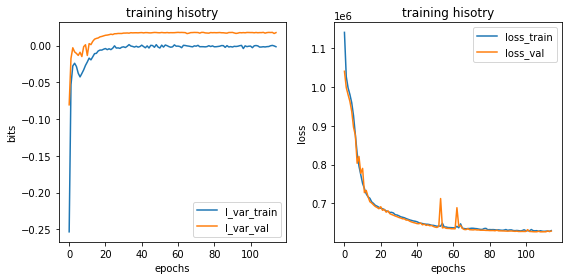

In [19]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [20]:
model.history['loss'][-1]/1e6

0.630068625

In [21]:
phi = gpmap.x_to_phi(x_test)

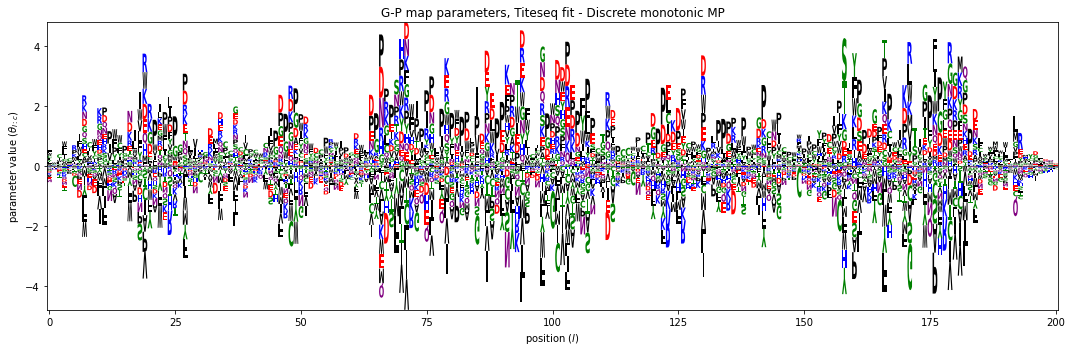

In [22]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True,color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters, Titeseq fit - Discrete monotonic MP')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_DM-MP.png',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

In [24]:
theta_raw_df = pd.DataFrame(theta,columns=alphabet)

In [25]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_single_mut_df.head(22)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
5,1,331,N,G,N331G,N1G,-0.06,-0.02,-0.04,-0.21,-0.29,-0.25
6,1,331,N,H,N331H,N1H,0.01,-0.05,-0.02,-0.86,-0.36,-0.61
7,1,331,N,I,N331I,N1I,-0.06,-0.08,-0.07,-1.05,-0.65,-0.85
8,1,331,N,K,N331K,N1K,-0.01,-0.01,-0.01,-0.17,-0.24,-0.20
9,1,331,N,L,N331L,N1L,-0.08,-0.01,-0.05,-0.81,-0.69,-0.75


In [26]:

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_lib1'].values[0:20]




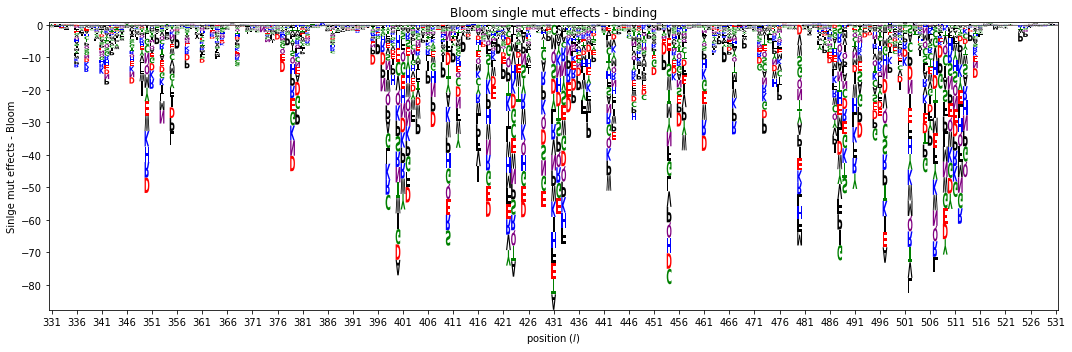

In [27]:
# Get G-P map parameters in matrix form
# theta = np.squeeze(gpmap.weights[1].numpy())

# # Create grid in phi space
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(bloom_bind_df.fillna(0), ax=ax,center_values=False, color_scheme='chemistry')
ax.set_ylabel('Sinlge mut effects - Bloom')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Bloom single mut effects - binding')
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only.png',dpi=300,bbox_inches='tight')
plt.show()

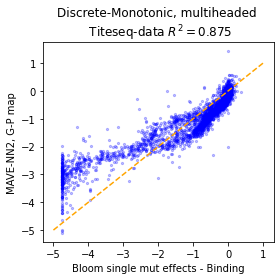

In [28]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, 2.2*theta_lc_consensus_df.values,s=5,alpha=0.25,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='orange')
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Discrete-Monotonic, multiheaded \n Titeseq-data $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison_DM.png',dpi=200,bbox_inches='tight')

In [29]:
#theta_lc_consensus_df.to_csv('discrete_monotonic_ace2rbd_binding.csv',index=False)

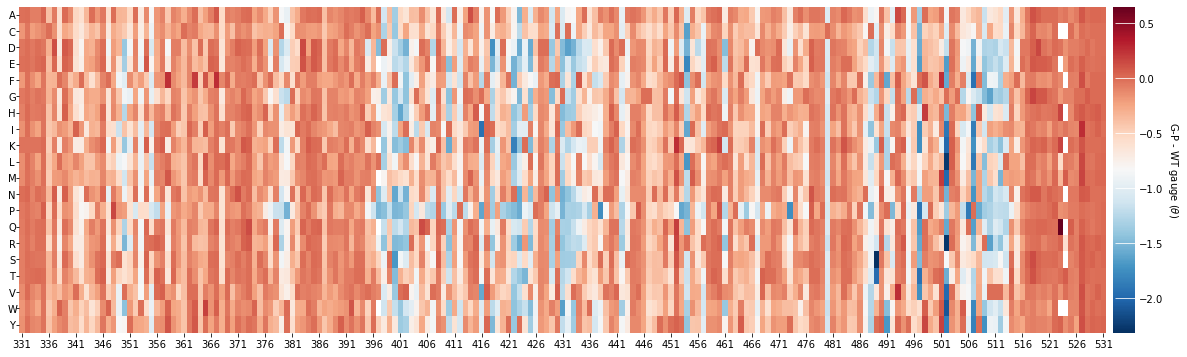

In [30]:

# # Create fig and ax objects
fig, ax = plt.subplots(figsize=[20,6])

# Draw heatmap
ax, cb = mavenn.heatmap(values=theta_lc,
                        alphabet='protein',
                        ax=ax,
                        #gpmap_type='additive',
                        cmap='RdBu_r',
                        cmap_size='2%')

# Style heatmap
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
#ax.set_xlabel('nucleotide position', labelpad=5)

# Style colorbar
cb.set_label('G-P - WT gauge ($\\theta$)',
             labelpad=10, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [31]:
np.save('titeseq_gpmap_discrete_monotonic',logo.df.values.ravel())

In [32]:
sortseq_gpmap = np.load('sortseq_gpmap_monotonic_agnostic.npy')
titeseq_gpmap = np.load('titeseq_gpmap_discrete_monotonic.npy')

In [33]:
# plt.figure(figsize=(5,5))
# # Compute R^2 between yhat_test and y_test
# Rsq = np.corrcoef(sortseq_gpmap,titeseq_gpmap)[0, 1]**2

# # Style plot
# xlim = [-1.5, 1.5]

# plt.scatter(sortseq_gpmap,titeseq_gpmap,s=4,color='blue',alpha=0.2)
# plt.xlabel('Sortseq G-P map parameters')
# plt.ylabel('Titeseq G-P map parameters')
# plt.title(f'$R^2$={Rsq:.3}');
# plt.plot(xlim, xlim, '--', color='k', label='diagonal')
# plt.xlim(xlim)
# plt.ylim(xlim)
# plt.show()

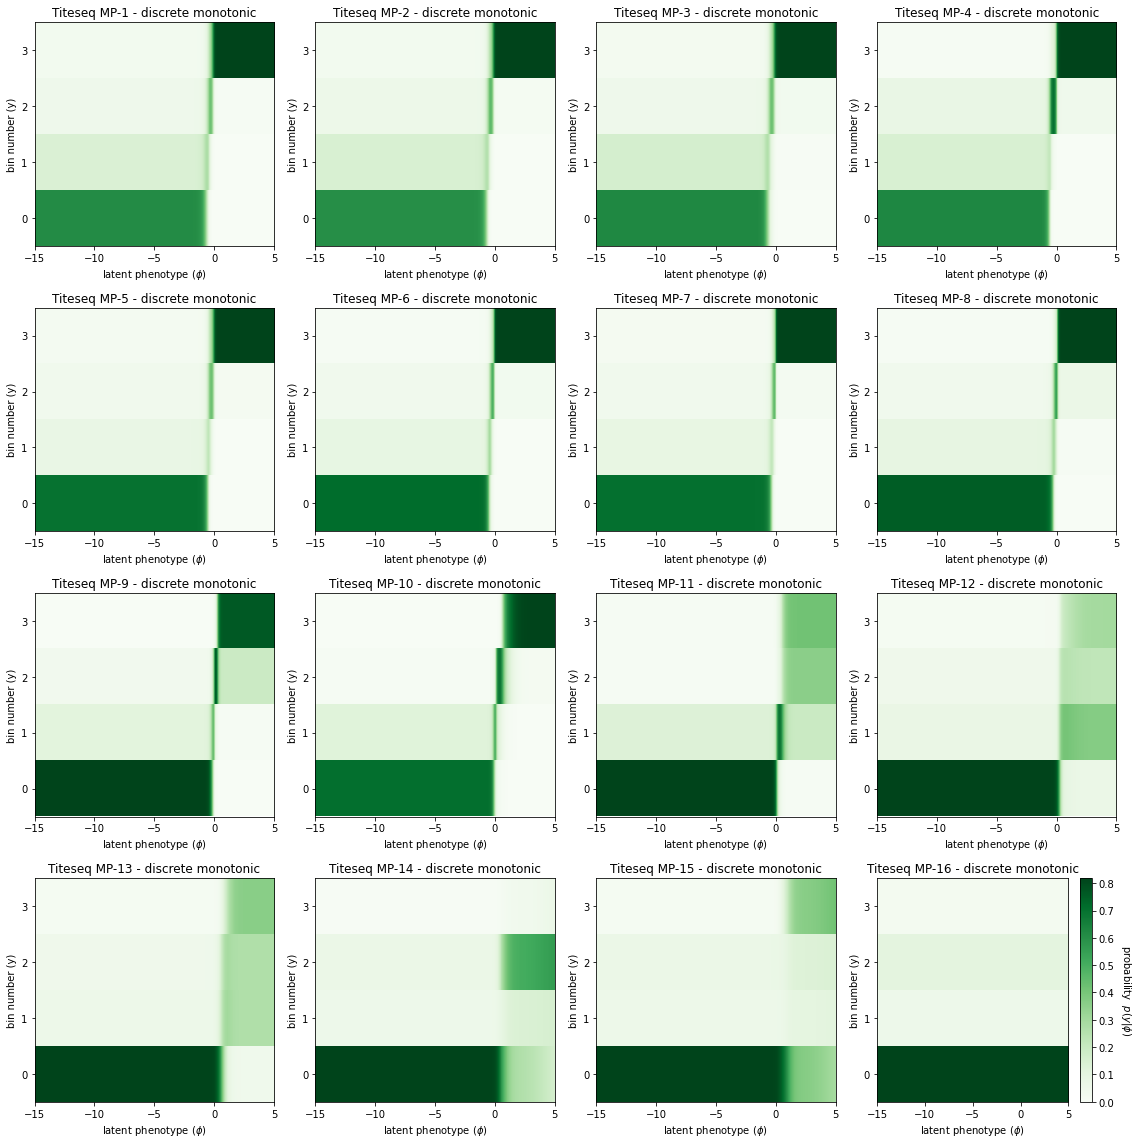

In [34]:
# Create grid in phi space
phi_lim = [-15, 5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1} - discrete monotonic')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_discrete_monotonic_MP_fit_to_Titeseq.png',dpi=300,bbox_inches='tight')


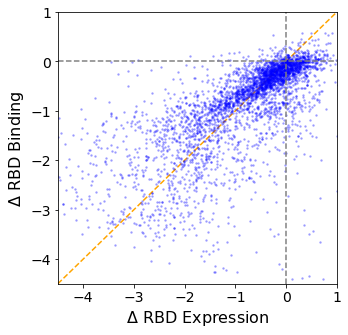

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(np.load('sortseq_gpmap_monotonic_agnostic_consensus.npy').ravel(),
            2.2*theta_lc_consensus_df.values,
           s=2.5,
           alpha=0.25,
           color='blue')
plt.xlim(-4.5,1)
plt.ylim(-4.5,1)

lims = [-4.5,1]

plt.plot(lims,lims,'--',color='orange',zorder=-2)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.xlabel('$\Delta$ RBD Expression',fontsize=16)
plt.ylabel('$\\Delta$ RBD Binding',fontsize=16)
plt.tick_params(labelsize=14)
plt.savefig('binding_vs_expression.png',dpi=200,bbox_inches='tight')

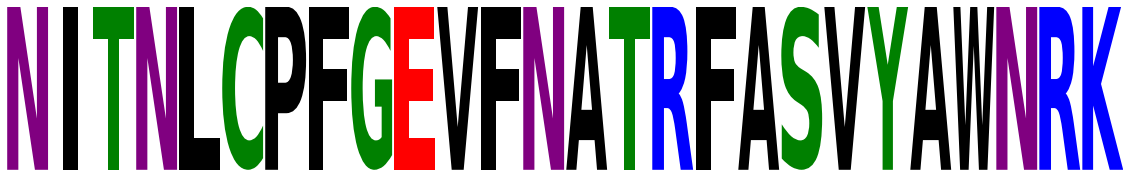

In [36]:
#model.x_consensus
fig, ax = plt.subplots(figsize=(20,3))
logomaker.Logo(logomaker.sequence_to_matrix(model.x_consensus).loc[0:25],color_scheme='chemistry',ax=ax)
ax.set_yticks([])
ax.set_xticks([])
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.savefig('rbd_seq_1.png',dpi=200,bbox_inches='tight')

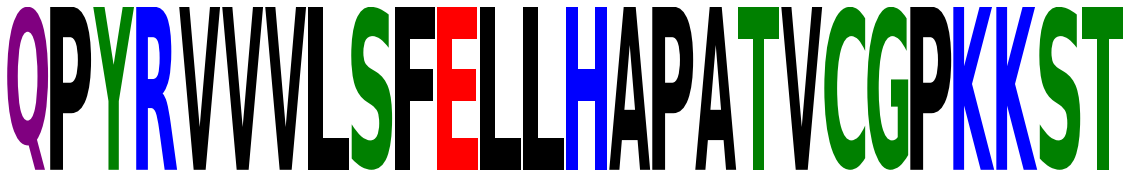

In [37]:
#model.x_consensus
fig, ax = plt.subplots(figsize=(20,3))
logomaker.Logo(logomaker.sequence_to_matrix(model.x_consensus).loc[175:],color_scheme='chemistry',ax=ax)
ax.set_yticks([])
ax.set_xticks([])
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.savefig('rbd_seq_2.png',dpi=200,bbox_inches='tight')

In [38]:
!pwd

/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn/mavenn/development_mavenn2/ace2rbd


In [94]:
x = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

x = np.array(x)[::-1]
def sigmoid(x,kd,a=2,b=0.):
    

    return (a*x)/(x+kd)+b

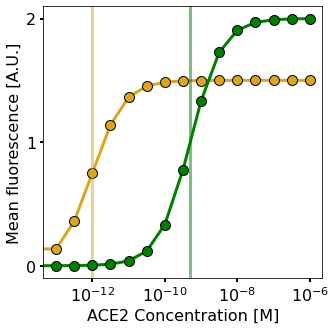

In [113]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,sigmoid(x,kd=1e-12,a=1.5),'o-',color='goldenrod',ms=10,lw=3,markeredgecolor='black')
ax.axvline(1e-12,lw=3,color='goldenrod',alpha=0.5)
ax.plot(x,sigmoid(x,kd=5e-10),'o-',color='green',ms=10,lw=3,markeredgecolor='black')
ax.axvline(5e-10,lw=3,color='green',alpha=0.5)
ax.set_xscale('log')
ax.tick_params(labelsize=16)
ax.set_yticks([0,1,2])
ax.set_xlabel('ACE2 Concentration [M]',fontsize=16)
ax.set_ylabel('Mean fluorescence [A.U.]',fontsize=16)
ax.tick_params(which='both', width=2)
#ax.tick_params(which='minor', length=0.5)
fig.savefig('titration_curves.png',dpi=200,bbox_inches='tight')